<a href="https://colab.research.google.com/github/LanceAlcala/CPEN-research/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [412]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from enum import auto
import io
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_space_consumption(obj):
    memory_usage = sys.getsizeof(obj)
    frame = sys._getframe()
    while frame:
        memory_usage += sys.getsizeof(frame.f_locals) + sys.getsizeof(frame.f_globals)
        frame = frame.f_back
    memory_usage_kb = memory_usage / 1024
    return memory_usage_kb

# Dataset

In [413]:
dataset = pd.read_csv("/content/dataset.csv")
dataset.head(4425)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [414]:
y = dataset['Target']
del dataset['Target']
X = dataset.values

K means clustering

In [415]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

Train dataset

In [416]:
X_train, X_test, y_train, y_test, train_labels, test_labels = train_test_split(
    X, y, cluster_labels, test_size=0.2, random_state=42
)
k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

Finding the optimal n for KNN

Minimum error:- 0.30056497175141245 at K = 12


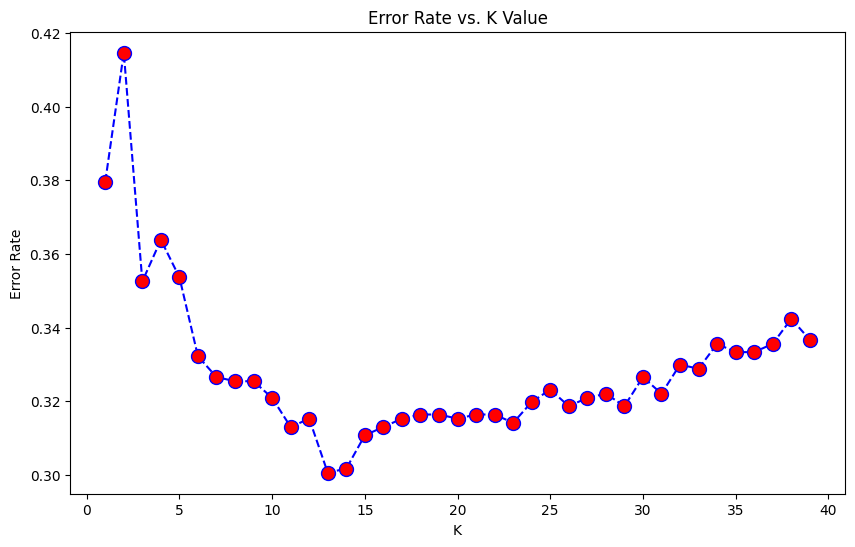

In [417]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Models

In [418]:
knn = KNeighborsClassifier(n_neighbors=12)
dnn = MLPClassifier(activation= 'relu',alpha= 0.004558327528535912, solver = 'adam', hidden_layer_sizes=(50, 50),learning_rate_init=0.04692488919658672)
voting_classifier = VotingClassifier(estimators=[('knn', knn), ('dnn', dnn)],voting='hard')

# Train Model

In [419]:
knnt0 = time.time()
knn.fit(X_train, y_train)
knnt1 = time.time()
print("KNN training took {:.2f}s".format(knnt1 - knnt0))


dnnt0 = time.time()
dnn.fit(X_train, y_train)
dnnt1 = time.time()
print("DNN training took {:.2f}s".format(dnnt1 - dnnt0))



hvt0 = time.time()
voting_classifier.fit(X_train, y_train)
hvt1 = time.time()
print("Hard Voting Ensemble training took {:.2f}s".format(hvt1 - hvt0))



KNN training took 0.01s
DNN training took 1.12s
Hard Voting Ensemble training took 2.49s


# Prediction

In [420]:
knnpt0 = time.time()
y_pred_KNN = knn.predict(X_test)
knnpt1 = time.time()


dnnpt0 = time.time()
y_pred_DNN = dnn.predict(X_test)
dnnpt1 = time.time()


hvpt0 = time.time()
y_pred_HV = voting_classifier.predict(X_test)
hvpt1 = time.time()


# Evaluation

1. Accuracy

In [421]:
knn_accuracy = accuracy_score(y_test, y_pred_KNN)
dnn_accuracy = accuracy_score(y_test, y_pred_DNN)
ensemble_accuracy = accuracy_score(y_test, y_pred_HV)

2. Precision

In [422]:
knn_precision = precision_score(y_test, y_pred_KNN, average='weighted')
dnn_precision = precision_score(y_test, y_pred_DNN, average='weighted')
ensemble_precision = precision_score(y_test, y_pred_HV, average='weighted')

3. Recall

In [423]:
knn_recall = recall_score(y_test, y_pred_KNN, average='weighted')
dnn_recall = recall_score(y_test, y_pred_DNN, average='weighted')
ensemble_recall = recall_score(y_test, y_pred_HV, average='weighted')

4. F1-score

In [424]:
knn_f1 = f1_score(y_test, y_pred_KNN, average='weighted')
dnn_f1 = f1_score(y_test, y_pred_DNN, average='weighted')
ensemble_f1 = f1_score(y_test, y_pred_HV, average='weighted')

5. Space Consumption

In [425]:
knnspace = get_space_consumption(y_pred_KNN)
dnnspace = get_space_consumption(y_pred_DNN)
hvspace = get_space_consumption(y_pred_HV)

# Results

Space Consumption

In [426]:
print("KNN Prediction Space Consumption:",round(knnspace,3),"KB")
print()
print("DNN Prediction Space Consumption:",round(dnnspace,3),"KB")
print()
print("Hard Voting Ensemble Prediction Space Consumption:",round(hvspace,3),"KB")

KNN Prediction Space Consumption: 138.383 KB

DNN Prediction Space Consumption: 166.039 KB

Hard Voting Ensemble Prediction Space Consumption: 145.297 KB


Prediction Time

In [427]:
print("KNN Prediction took {:.2f}s".format(knnpt1 - knnpt0))
knntime = knnpt1 - knnpt0
print()
dnntime = print("DNN Prediction took {:.2f}s".format(dnnpt1 - dnnpt0))
dnntime = dnnpt1 - dnnpt0
print()
hvtime = print("Hard Voting Ensemble Prediction took {:.2f}s".format(hvpt1 - hvpt0))
hvtime = hvpt1 - hvpt0

KNN Prediction took 0.18s

DNN Prediction took 0.01s

Hard Voting Ensemble Prediction took 0.17s


Accuracy Score

In [428]:
print("KNN Accuracy Score:", knn_accuracy)
print()
print("DNN Accuracy Score:", dnn_accuracy)
print()
print("Hard Voting Ensemble Accuracy Score:", ensemble_accuracy)
print()

KNN Accuracy Score: 0.6847457627118644

DNN Accuracy Score: 0.7457627118644068

Hard Voting Ensemble Accuracy Score: 0.7491525423728813



Precision Score

In [429]:
print("KNN Precision Score:", knn_precision)
print()
print("DNN Precision Score:", dnn_precision)
print()
print("Hard Voting Ensemble Precision Score:", ensemble_precision)

KNN Precision Score: 0.6779134970889652

DNN Precision Score: 0.727320187858492

Hard Voting Ensemble Precision Score: 0.7287030399259168


Recall Score

In [430]:
print("KNN Recall Score:", knn_recall)
print()
print("DNN Recall Score:", dnn_recall)
print()
print("Hard Voting Ensemble Recall Score:", ensemble_recall)

KNN Recall Score: 0.6847457627118644

DNN Recall Score: 0.7457627118644068

Hard Voting Ensemble Recall Score: 0.7491525423728813


F1 - Score

In [431]:
print("KNN F1 Score:", knn_f1)
print()
print("DNN F1 Score:", dnn_f1)
print()
print("Hard Voting Ensemble F1 Score:", ensemble_f1)

KNN F1 Score: 0.6521369477526018

DNN F1 Score: 0.7234280595067798

Hard Voting Ensemble F1 Score: 0.7357498432513555


# Final Result

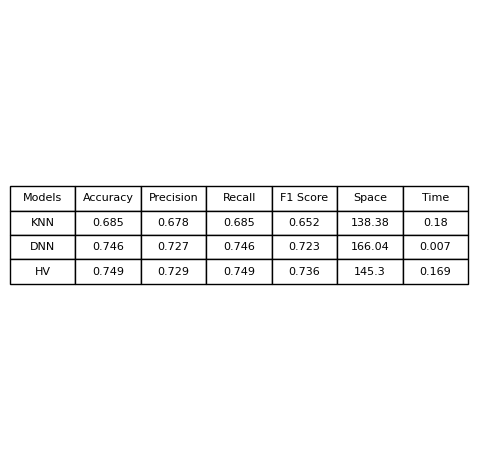

In [432]:
def create_table(data, headers):
    fig, ax = plt.subplots()

    table = ax.table(cellText=data, colLabels=headers, cellLoc="center", loc="center", colWidths=[0.2]*len(headers))
    table.auto_set_font_size(True)
    table.set_fontsize(14)
    table.scale(1.2, 1.2)

    ax.axis("off")
    fig.tight_layout()
    plt.show()


table_data = [
    ["KNN", round(knn_accuracy,3), round(knn_precision,3), round(knn_recall,3), round(knn_f1,3), round(knnspace,2), round(knntime,2)],
    ["DNN", round(dnn_accuracy,3), round(dnn_precision,3), round(dnn_recall,3), round(dnn_f1,3), round(dnnspace,2), round(dnntime,3)],
    ["HV", round(ensemble_accuracy,3), round(ensemble_precision,3), round(ensemble_recall,3), round(ensemble_f1,3), round(hvspace,2), round(hvtime,3)],
]

table_headers = ["Models", "Accuracy", "Precision", 'Recall', 'F1 Score','Space','Time']

create_table(table_data, table_headers)